In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import autokeras as ak
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

In [35]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [36]:
train['class'].value_counts()

B    114
C     79
A     69
Name: class, dtype: int64

In [37]:
train.columns

Index(['id', 'father', 'mother', 'gender', 'trait', 'SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15', 'class'],
      dtype='object')

In [38]:
for idx in range(1,10):
    for i in range(len(train)):
        train.loc[i,f'SNP_0{idx}_x'] = train.loc[i,f'SNP_0{idx}'].split()[0]
        train.loc[i,f'SNP_0{idx}_y'] = train.loc[i,f'SNP_0{idx}'].split()[1]
        train.loc[i,f'SNP_0{idx}_x_y'] = train.loc[i,f'SNP_0{idx}'].split()[1]
        train.loc[i,f'SNP_0{idx}_y_x'] = train.loc[i,f'SNP_0{idx}'].split()[0]
for idx in range(10,16):
    for i in range(len(train)):
        train.loc[i,f'SNP_{idx}_x'] = train.loc[i,f'SNP_{idx}'].split()[0]
        train.loc[i,f'SNP_{idx}_y'] = train.loc[i,f'SNP_{idx}'].split()[1]
        train.loc[i,f'SNP_{idx}_x_y'] = train.loc[i,f'SNP_{idx}'].split()[1]
        train.loc[i,f'SNP_{idx}_y_x'] = train.loc[i,f'SNP_{idx}'].split()[0]

for idx in range(1,10):
    for i in range(len(test)):
        test.loc[i,f'SNP_0{idx}_x'] = test.loc[i,f'SNP_0{idx}'].split()[0]
        test.loc[i,f'SNP_0{idx}_y'] = test.loc[i,f'SNP_0{idx}'].split()[1]
        test.loc[i,f'SNP_0{idx}_x_y'] = test.loc[i,f'SNP_0{idx}'].split()[1]
        test.loc[i,f'SNP_0{idx}_y_x'] = test.loc[i,f'SNP_0{idx}'].split()[0]
for idx in range(10,16):
    for i in range(len(test)):
        test.loc[i,f'SNP_{idx}_x'] = test.loc[i,f'SNP_{idx}'].split()[0]
        test.loc[i,f'SNP_{idx}_y'] = test.loc[i,f'SNP_{idx}'].split()[1]
        test.loc[i,f'SNP_{idx}_x_y'] = test.loc[i,f'SNP_{idx}'].split()[1]
        test.loc[i,f'SNP_{idx}_y_x'] = test.loc[i,f'SNP_{idx}'].split()[0]      

        

# chrom6 = ['SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09']

# for i in range(len(train)):
#     tar = '' 
#     for chrom in chrom6:
#         tar += train.loc[i,chrom]
#     train.loc[i,'chrom6'] = tar

train.columns



Index(['id', 'father', 'mother', 'gender', 'trait', 'SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15', 'class',
       'SNP_01_x', 'SNP_01_y', 'SNP_01_x_y', 'SNP_01_y_x', 'SNP_02_x',
       'SNP_02_y', 'SNP_02_x_y', 'SNP_02_y_x', 'SNP_03_x', 'SNP_03_y',
       'SNP_03_x_y', 'SNP_03_y_x', 'SNP_04_x', 'SNP_04_y', 'SNP_04_x_y',
       'SNP_04_y_x', 'SNP_05_x', 'SNP_05_y', 'SNP_05_x_y', 'SNP_05_y_x',
       'SNP_06_x', 'SNP_06_y', 'SNP_06_x_y', 'SNP_06_y_x', 'SNP_07_x',
       'SNP_07_y', 'SNP_07_x_y', 'SNP_07_y_x', 'SNP_08_x', 'SNP_08_y',
       'SNP_08_x_y', 'SNP_08_y_x', 'SNP_09_x', 'SNP_09_y', 'SNP_09_x_y',
       'SNP_09_y_x', 'SNP_10_x', 'SNP_10_y', 'SNP_10_x_y', 'SNP_10_y_x',
       'SNP_11_x', 'SNP_11_y', 'SNP_11_x_y', 'SNP_11_y_x', 'SNP_12_x',
       'SNP_12_y', 'SNP_12_x_y', 'SNP_12_y_x', 'SNP_13_x', 'SNP_13_y',
       'SNP_13_x_y', 'SNP_13_y_x', 'SNP_14_x', 'SNP_14_y'

In [39]:
chrom6 = ['SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09']
chrom9 = ['SNP_12', 'SNP_13', 'SNP_14']

for i in range(len(train)):
    tar = '' 
    for chrom in chrom6:
        tar += train.loc[i,chrom] + ' '
    train.loc[i,'chrom6'] = tar

for i in range(len(train)):
    tar = '' 
    for chrom in chrom9:
        tar += train.loc[i,chrom] + ' '
    train.loc[i,'chrom9'] = tar
    
for i in range(len(test)):
    tar = '' 
    for chrom in chrom6:
        tar += test.loc[i,chrom] + ' '
    test.loc[i,'chrom6'] = tar

for i in range(len(test)):
    tar = '' 
    for chrom in chrom9:
        tar += test.loc[i,chrom] + ' '
    test.loc[i,'chrom9'] = tar
    
# print(train['chrom9'].value_counts())
# print(test['chrom9'].value_counts())

In [40]:
bag = {'ARS' : ['SNP_02','SNP_03', 'SNP_04', 'SNP_09', 'SNP_11'],
       'BTB' : ['SNP_10','SNP_13'],
       'HAP' : ['SNP_07','SNP_12','SNP_14'],
       'BOV' : ['SNP_05','SNP_06','SNP_08','SNP_15']
}

for i in range(len(train)):
    for item in bag:
        tar = ''
        for chrom in bag[item]:
            tar += train.loc[i,chrom] + ' '
        train.loc[i,item] = tar
        
for i in range(len(test)):
    for item in bag:
        tar = ''
        for chrom in bag[item]:
            tar += test.loc[i,chrom] + ' '
        test.loc[i,item] = tar

In [9]:
# train = train[train['class']!='A']
# test = test[test['trait']==2]
le = preprocessing.LabelEncoder()
tar = ['SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
      'SNP_01_x', 'SNP_01_y', 'SNP_01_x_y', 'SNP_01_y_x', 'SNP_02_x',
       'SNP_02_y', 'SNP_02_x_y', 'SNP_02_y_x', 'SNP_03_x', 'SNP_03_y',
       'SNP_03_x_y', 'SNP_03_y_x', 'SNP_04_x', 'SNP_04_y', 'SNP_04_x_y',
       'SNP_04_y_x', 'SNP_05_x', 'SNP_05_y', 'SNP_05_x_y', 'SNP_05_y_x',
       'SNP_06_x', 'SNP_06_y', 'SNP_06_x_y', 'SNP_06_y_x', 'SNP_07_x',
       'SNP_07_y', 'SNP_07_x_y', 'SNP_07_y_x', 'SNP_08_x', 'SNP_08_y',
       'SNP_08_x_y', 'SNP_08_y_x', 'SNP_09_x', 'SNP_09_y', 'SNP_09_x_y',
       'SNP_09_y_x', 'SNP_10_x', 'SNP_10_y', 'SNP_10_x_y', 'SNP_10_y_x',
       'SNP_11_x', 'SNP_11_y', 'SNP_11_x_y', 'SNP_11_y_x', 'SNP_12_x',
       'SNP_12_y', 'SNP_12_x_y', 'SNP_12_y_x', 'SNP_13_x', 'SNP_13_y',
       'SNP_13_x_y', 'SNP_13_y_x', 'SNP_14_x', 'SNP_14_y', 'SNP_14_x_y',
       'SNP_14_y_x', 'SNP_15_x', 'SNP_15_y', 'SNP_15_x_y', 'SNP_15_y_x','chrom6','chrom9','ARS', 'BTB', 'HAP', 'BOV']
for col in tar:
    le.fit(test[col])
    test[col] = le.transform(test[col])
    
tar = ['SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
       'SNP_01_x', 'SNP_01_y', 'SNP_01_x_y', 'SNP_01_y_x', 'SNP_02_x',
       'SNP_02_y', 'SNP_02_x_y', 'SNP_02_y_x', 'SNP_03_x', 'SNP_03_y',
       'SNP_03_x_y', 'SNP_03_y_x', 'SNP_04_x', 'SNP_04_y', 'SNP_04_x_y',
       'SNP_04_y_x', 'SNP_05_x', 'SNP_05_y', 'SNP_05_x_y', 'SNP_05_y_x',
       'SNP_06_x', 'SNP_06_y', 'SNP_06_x_y', 'SNP_06_y_x', 'SNP_07_x',
       'SNP_07_y', 'SNP_07_x_y', 'SNP_07_y_x', 'SNP_08_x', 'SNP_08_y',
       'SNP_08_x_y', 'SNP_08_y_x', 'SNP_09_x', 'SNP_09_y', 'SNP_09_x_y',
       'SNP_09_y_x', 'SNP_10_x', 'SNP_10_y', 'SNP_10_x_y', 'SNP_10_y_x',
       'SNP_11_x', 'SNP_11_y', 'SNP_11_x_y', 'SNP_11_y_x', 'SNP_12_x',
       'SNP_12_y', 'SNP_12_x_y', 'SNP_12_y_x', 'SNP_13_x', 'SNP_13_y',
       'SNP_13_x_y', 'SNP_13_y_x', 'SNP_14_x', 'SNP_14_y', 'SNP_14_x_y',
       'SNP_14_y_x', 'SNP_15_x', 'SNP_15_y', 'SNP_15_x_y', 'SNP_15_y_x','chrom6','chrom9','ARS', 'BTB', 'HAP', 'BOV','class']
for col in tar:
    le.fit(train[col])
    train[col] = le.transform(train[col])

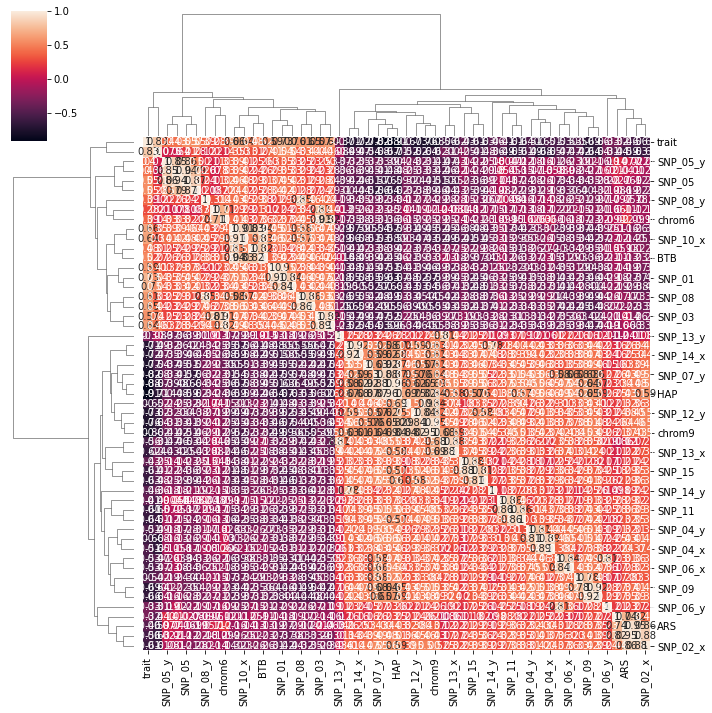

In [10]:
target = ['trait', 'SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
          'SNP_01_x', 'SNP_01_y', 'SNP_02_x', 'SNP_02_y', 'SNP_03_x', 'SNP_03_y',
       'SNP_04_x', 'SNP_04_y', 'SNP_05_x', 'SNP_05_y', 'SNP_06_x', 'SNP_06_y',
       'SNP_07_x', 'SNP_07_y', 'SNP_08_x', 'SNP_08_y', 'SNP_09_x', 'SNP_09_y',
       'SNP_10_x', 'SNP_10_y', 'SNP_11_x', 'SNP_11_y', 'SNP_12_x', 'SNP_12_y',
       'SNP_13_x', 'SNP_13_y', 'SNP_14_x', 'SNP_14_y', 'SNP_15_x', 'SNP_15_y','chrom6','chrom9','ARS', 'BTB', 'HAP', 'BOV','class']
sns.clustermap(train.loc[:,target].corr(),annot=True)

In [11]:
train.loc[:,target].corr()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_14_y,SNP_15_x,SNP_15_y,chrom6,chrom9,ARS,BTB,HAP,BOV,class
trait,1.000000,0.732876,-0.558326,0.568742,-0.604016,0.548950,-0.527008,-0.876010,0.608936,-0.687985,...,-0.457579,-0.426271,-0.628027,0.387481,-0.798804,-0.459142,0.522376,-0.912889,0.431344,0.826978
SNP_01,0.732876,1.000000,-0.367094,0.471602,-0.384073,0.449491,-0.432030,-0.627443,0.460054,-0.460103,...,-0.328356,-0.316938,-0.457835,0.372753,-0.593898,-0.269992,0.418970,-0.666209,0.353818,0.538009
SNP_02,-0.558326,-0.367094,1.000000,-0.260399,0.405666,-0.119215,0.357868,0.478507,-0.295916,0.410250,...,0.237077,0.240501,0.356857,-0.098581,0.432781,0.946318,-0.229512,0.511269,-0.011747,-0.627540
SNP_03,0.568742,0.471602,-0.260399,1.000000,-0.341657,0.282002,-0.347028,-0.518701,0.526315,-0.417378,...,-0.277197,-0.187558,-0.328798,0.911131,-0.390845,0.014029,0.422576,-0.517846,0.226965,0.403247
SNP_04,-0.604016,-0.384073,0.405666,-0.341657,1.000000,-0.260659,0.456988,0.555693,-0.286681,0.513975,...,0.307431,0.174639,0.333513,0.030285,0.424701,0.431437,-0.233038,0.558594,-0.126776,-0.681239
SNP_05,0.548950,0.449491,-0.119215,0.282002,-0.260659,1.000000,-0.340798,-0.598221,0.308640,-0.346092,...,-0.213386,-0.226792,-0.394899,0.315467,-0.505417,-0.068878,0.310454,-0.592108,0.944826,0.207899
SNP_06,-0.527008,-0.432030,0.357868,-0.347028,0.456988,-0.340798,1.000000,0.472210,-0.398591,0.490965,...,0.211646,0.249152,0.363433,-0.162736,0.421991,0.313451,-0.305012,0.487846,-0.039192,-0.472931
SNP_07,-0.876010,-0.627443,0.478507,-0.518701,0.555693,-0.598221,0.472210,1.000000,-0.490662,0.637505,...,0.318986,0.392598,0.559202,-0.364643,0.687061,0.396403,-0.447964,0.963528,-0.481234,-0.668755
SNP_08,0.608936,0.460054,-0.295916,0.526315,-0.286681,0.308640,-0.398591,-0.490662,1.000000,-0.485897,...,-0.361149,-0.275957,-0.369046,0.454574,-0.496330,-0.165732,0.489058,-0.527420,0.294045,0.327988
SNP_09,-0.687985,-0.460103,0.410250,-0.417378,0.513975,-0.346092,0.490965,0.637505,-0.485897,1.000000,...,0.246285,0.232608,0.406098,-0.233527,0.527033,0.371708,-0.358829,0.650409,-0.221275,-0.641171


In [12]:
# BOV,SNP_13_y

In [13]:
# # train = pd.read_csv('./train.csv')
# target = ['trait', 'SNP_01', 'SNP_02',
#        'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
#        'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15','class'] # test 내부 컬럼이 모두 사용됬습니다.
# comp4 = train.loc[:,target]
# train4, test4 = train_test_split(comp4, test_size=0.1, random_state=21)
# train4.to_csv(f'./comp_train.csv')
# test4.to_csv(f'./comp_test.csv')

# target = [ 'id','trait','SNP_01', 'SNP_02',
#        'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
#        'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15']
# # test = pd.read_csv('./test.csv')
# tp = test.loc[:,['id']]
# test = test.loc[:,target]
# test = test.drop('id',axis=1)
# test.to_csv('./test_target.csv')

# ###############################################

# clf = ak.StructuredDataClassifier(
#     max_trials=5,  # 10회 생성
#     overwrite=True,
# )
# # 몇가지 옵션요소가 있습니다.
# # https://autokeras.com/

# clf.fit(
#     f'./comp_train.csv', # train path
#     "class", # label
#     epochs=200,
# )

# predicted_y = clf.predict(f'./comp_test.csv') # valid path
# print(clf.evaluate(f'./comp_test.csv', "class"))
# model = clf.export_model()
# pred = model.predict(pd.read_csv('./test_target.csv')) # test path

In [14]:
# train = pd.read_csv('./train.csv')
target = ['trait', 'SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
          'SNP_01_x', 'SNP_01_y', 'SNP_02_x', 'SNP_02_y', 'SNP_03_x', 'SNP_03_y',
       'SNP_04_x', 'SNP_04_y', 'SNP_05_x', 'SNP_05_y', 'SNP_06_x', 'SNP_06_y',
       'SNP_07_x', 'SNP_07_y', 'SNP_08_x', 'SNP_08_y', 'SNP_09_x', 'SNP_09_y',
       'SNP_10_x', 'SNP_10_y', 'SNP_11_x', 'SNP_11_y', 'SNP_12_x', 'SNP_12_y',
       'SNP_13_x', 'SNP_13_y', 'SNP_14_x', 'SNP_14_y', 'SNP_15_x', 'SNP_15_y'
          ,'class'] # test 내부 컬럼이 모두 사용됬습니다.

comp4 = train.loc[:,target]
# train4, test4 = train_test_split(comp4, test_size=0.1, random_state=21)
comp4.to_csv(f'./comp_train.csv')
# test.to_csv(f'./comp_test.csv')

target = [ 'id','trait','SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
         'SNP_01_x', 'SNP_01_y', 'SNP_02_x', 'SNP_02_y', 'SNP_03_x', 'SNP_03_y',
       'SNP_04_x', 'SNP_04_y', 'SNP_05_x', 'SNP_05_y', 'SNP_06_x', 'SNP_06_y',
       'SNP_07_x', 'SNP_07_y', 'SNP_08_x', 'SNP_08_y', 'SNP_09_x', 'SNP_09_y',
       'SNP_10_x', 'SNP_10_y', 'SNP_11_x', 'SNP_11_y', 'SNP_12_x', 'SNP_12_y',
       'SNP_13_x', 'SNP_13_y', 'SNP_14_x', 'SNP_14_y', 'SNP_15_x', 'SNP_15_y']

# test = pd.read_csv('./test.csv')
tp = test.loc[:,['id']]
test = test.loc[:,target]
test = test.drop('id',axis=1)
test.to_csv('./test_target.csv')

###############################################

clf = ak.StructuredDataClassifier(
    max_trials=5,  # 10회 생성
    overwrite=True,
)
# 몇가지 옵션요소가 있습니다.
# https://autokeras.com/

clf.fit(
    f'./comp_train.csv', # train path
    "class", # label
    epochs=100,
)

# predicted_y = clf.predict(f'./comp_test.csv') # valid path
# print(clf.evaluate(f'./comp_test.csv', "class"))
model = clf.export_model()
pred = model.predict(pd.read_csv('./test_target.csv')) # test path

Trial 5 Complete [00h 00m 14s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 01m 05s
INFO:tensorflow:Oracle triggered exit
Epoch 1/100
9/9 [==============================] - 1s 2ms/step - loss: 1.0193 - accuracy: 0.4275
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.7802 - accuracy: 0.7176
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.5963 - accuracy: 0.8473
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.4574 - accuracy: 0.9160
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 0.3565 - accuracy: 0.9313
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.2831 - accuracy: 0.9427
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.2295 - accuracy: 0.9427
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1900 - accuracy: 0.9504
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1

9/9 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 84/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 85/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 86/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 87/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 88/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 89/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 90/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 91/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 92/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 93/100
9/9 [===============

In [15]:
# print(clf.evaluate(f'./comp_test.csv', "class"))
# model = clf.export_model()
# pred = model.predict(pd.read_csv('./test_target.csv')) # test path

In [16]:
pred

array([[9.99512732e-01, 3.36782468e-05, 4.53528046e-04],
       [5.31294253e-09, 9.99999702e-01, 1.83261051e-07],
       [8.78484025e-06, 2.98129592e-08, 9.99991119e-01],
       [5.98685911e-05, 8.44666660e-01, 1.55273452e-01],
       [9.99862194e-01, 1.08656939e-04, 2.91024753e-05],
       [6.39910667e-08, 9.99974549e-01, 2.52322479e-05],
       [4.41518117e-04, 7.31611817e-06, 9.99551117e-01],
       [2.89284884e-07, 9.99987543e-01, 1.22093361e-05],
       [9.99995530e-01, 2.23114867e-07, 4.15684826e-06],
       [9.99996126e-01, 2.89044578e-06, 1.00368106e-06],
       [2.10354230e-07, 9.54990931e-09, 9.99999702e-01],
       [8.47502452e-06, 9.99974906e-01, 1.65987531e-05],
       [1.57894829e-04, 3.30459237e-01, 6.69382930e-01],
       [9.99996364e-01, 1.32457137e-06, 2.30565615e-06],
       [7.74417458e-07, 9.97784078e-01, 2.21509859e-03],
       [1.43463055e-08, 9.99999106e-01, 8.18005731e-07],
       [9.99979079e-01, 3.36239032e-06, 1.74922206e-05],
       [5.01629415e-07, 9.99927

In [17]:
aa = [le.inverse_transform([np.argmax(i)])[0] for i in pred]
tp['class'] = aa

# submission 형식을 맞춰주세요
tp = tp.set_index('id')

tp.to_csv('./comp_ans.csv')
pd.read_csv('./comp_ans.csv')['class'].value_counts()

B    86
A    51
C    38
Name: class, dtype: int64

In [18]:
# aa = []
# for i in pred:
#     if i > 0.5:
#         aa.append(0)
#     else:
#         aa.append(1)

# aa = [le.inverse_transform([i])[0] for i in aa]
# tp['class'] = aa
# tp = tp.set_index('id')


In [19]:
# tp = tp.reset_index()
# tp

In [20]:
# hi = pd.read_csv('./sample_submission.csv')
# hi

In [21]:
# hi['class'] = hi.merge(tp,on='id',how='outer').fillna('A')['class_y']
# hi = hi.set_index('id')
# hi.to_csv('./submission.csv')
# pd.read_csv('./submission.csv')

In [22]:
# train = pd.read_csv('./train.csv')
# test = pd.read_csv('./test.csv')
# for idx in range(1,10):
#     for i in range(len(train)):
#         train.loc[i,f'SNP_0{idx}_x'] = train.loc[i,f'SNP_0{idx}'].split()[0]
#         train.loc[i,f'SNP_0{idx}_y'] = train.loc[i,f'SNP_0{idx}'].split()[1]

# for idx in range(10,16):
#     for i in range(len(train)):
#         train.loc[i,f'SNP_{idx}_x'] = train.loc[i,f'SNP_{idx}'].split()[0]
#         train.loc[i,f'SNP_{idx}_y'] = train.loc[i,f'SNP_{idx}'].split()[1]

# for idx in range(1,10):
#     for i in range(len(test)):
#         test.loc[i,f'SNP_0{idx}_x'] = test.loc[i,f'SNP_0{idx}'].split()[0]
#         test.loc[i,f'SNP_0{idx}_y'] = test.loc[i,f'SNP_0{idx}'].split()[1]

# for idx in range(10,16):
#     for i in range(len(test)):
#         test.loc[i,f'SNP_{idx}_x'] = test.loc[i,f'SNP_{idx}'].split()[0]
#         test.loc[i,f'SNP_{idx}_y'] = test.loc[i,f'SNP_{idx}'].split()[1]    

# chrom6 = ['SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09']
# chrom9 = ['SNP_12', 'SNP_13', 'SNP_14']

# for i in range(len(train)):
#     tar = '' 
#     for chrom in chrom6:
#         tar += train.loc[i,chrom] + ' '
#     train.loc[i,'chrom6'] = tar

# for i in range(len(train)):
#     tar = '' 
#     for chrom in chrom9:
#         tar += train.loc[i,chrom] + ' '
#     train.loc[i,'chrom9'] = tar
    
# for i in range(len(test)):
#     tar = '' 
#     for chrom in chrom6:
#         tar += test.loc[i,chrom] + ' '
#     test.loc[i,'chrom6'] = tar

# for i in range(len(test)):
#     tar = '' 
#     for chrom in chrom9:
#         tar += test.loc[i,chrom] + ' '
#     test.loc[i,'chrom9'] = tar        
        
# bag = {'ARS' : ['SNP_02','SNP_03', 'SNP_04', 'SNP_09', 'SNP_11'],
#        'BTB' : ['SNP_10','SNP_13'],
#        'HAP' : ['SNP_07','SNP_12','SNP_14'],
#        'BOV' : ['SNP_05','SNP_06','SNP_08','SNP_15']
# }

# for i in range(len(train)):
#     for item in bag:
#         tar = ''
#         for chrom in bag[item]:
#             tar += train.loc[i,chrom] + ' '
#         train.loc[i,item] = tar
        
# for i in range(len(test)):
#     for item in bag:
#         tar = ''
#         for chrom in bag[item]:
#             tar += test.loc[i,chrom] + ' '
#         test.loc[i,item] = tar
        
# train.columns

In [23]:
# # train = train[train['class']!='A']
# # test = test[test['trait']==2]
# le = preprocessing.LabelEncoder()
# tar = ['SNP_01', 'SNP_02',
#        'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
#        'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
#        'SNP_01_x', 'SNP_01_y', 'SNP_02_x', 'SNP_02_y', 'SNP_03_x', 'SNP_03_y',
#        'SNP_04_x', 'SNP_04_y', 'SNP_05_x', 'SNP_05_y', 'SNP_06_x', 'SNP_06_y',
#        'SNP_07_x', 'SNP_07_y', 'SNP_08_x', 'SNP_08_y', 'SNP_09_x', 'SNP_09_y',
#        'SNP_10_x', 'SNP_10_y', 'SNP_11_x', 'SNP_11_y', 'SNP_12_x', 'SNP_12_y',
#        'SNP_13_x', 'SNP_13_y', 'SNP_14_x', 'SNP_14_y', 'SNP_15_x', 'SNP_15_y','chrom6','chrom9', 'ARS', 'BTB', 'HAP', 'BOV']
# for col in tar:
#     le.fit(test[col])
#     test[col] = le.transform(test[col])
    
# tar = ['SNP_01', 'SNP_02',
#        'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
#        'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
#        'SNP_01_x', 'SNP_01_y', 'SNP_02_x', 'SNP_02_y', 'SNP_03_x', 'SNP_03_y',
#        'SNP_04_x', 'SNP_04_y', 'SNP_05_x', 'SNP_05_y', 'SNP_06_x', 'SNP_06_y',
#        'SNP_07_x', 'SNP_07_y', 'SNP_08_x', 'SNP_08_y', 'SNP_09_x', 'SNP_09_y',
#        'SNP_10_x', 'SNP_10_y', 'SNP_11_x', 'SNP_11_y', 'SNP_12_x', 'SNP_12_y',
#        'SNP_13_x', 'SNP_13_y', 'SNP_14_x', 'SNP_14_y', 'SNP_15_x', 'SNP_15_y','chrom6','chrom9', 'ARS', 'BTB', 'HAP', 'BOV', 'class']
# for col in tar:
#     le.fit(train[col])
#     train[col] = le.transform(train[col])

In [24]:
# y = train['class']
# x = train.drop(['id','class'],axis=1)

In [25]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(bootstrap=500,random_state=10)
# rf.fit(x,y)

In [26]:
# test = test.drop('id',axis=1)

In [27]:
# pd.DataFrame(rf.predict(test))

In [28]:
# [np.argmax(i) for i in pred] == rf.predict(test)

In [29]:
# tar.pop()
# tp = pd.DataFrame([[np.argmax(i) for i in pred] == rf.predict(test)]).transpose()
# tp[tp[0] == False]

In [30]:
# sum([np.argmax(i) for i in pred] == rf.predict(test))/len(test)

In [31]:
# [le.inverse_transform([i])[0] for i in rf.predict(test)]

In [32]:
# pd.read_csv('./sample_submission.csv')

In [33]:
# tp = pd.read_csv('./sample_submission.csv')

# aa = [le.inverse_transform([i])[0] for i in rf.predict(test)]
# tp['class'] = aa

# # submission 형식을 맞춰주세요
# tp = tp.set_index('id')

# tp.to_csv('./submission.csv')
# pd.read_csv('./submission.csv')